# Analisi Intermarket

## Commodity

CRB Index. Fonte dati: https://it.tradingeconomics.com/commodity/crb

In [1]:
# Import librerie
import datetime as dt
import json
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import scipy
register_matplotlib_converters()

In [36]:
# Configurazione
start_date = '1995-01-01' #dt.datetime(2000,1,1)
end_date = '2019-10-01' #dt.datetime(2019,10,1)
date_range = pd.date_range(start_date, end_date, freq='MS')

start_date_2 = '2010-08-01'
date_range_2 = pd.date_range(start_date_2, end_date, freq='MS')


In [3]:
# Definizione funzioni di supporto
def get_correlation_statistics(correlations_vector):
    '''
    Restituisce le statistiche sulla correlazione fra 2 vettori.
    '''
    # Conto percentuale positivi e negativi
    valid_data = len(correlations_vector[correlations_vector.notnull()])

    corr_stats = {
        'pos': round(len(correlations_vector[correlations_vector > 0]) / valid_data * 100, 2),
        'neg': round(len(correlations_vector[correlations_vector < 0]) / valid_data * 100, 2),
        'strong_pos': round(len(correlations_vector[correlations_vector > 0.7]) / valid_data * 100, 2),
        'strong_neg': round(len(correlations_vector[correlations_vector < -0.7]) / valid_data * 100, 2)
    }
    return corr_stats

def plot_correlations(series1, series2, series1_label, series2_label):
    # Calcolo correlazione
    correlations = series1.rolling(12).corr(series2)
    # Preparo i due grafici
    fig,ax = plt.subplots(2,figsize=(18,8))
    # Limito il range delle ascisse all'intervallo di date selezionato
    ax[0].set_xlim(date_range[0], date_range[-1])
    ax[1].set_xlim(date_range[0], date_range[-1])
    
    # Disegno il grafico con gli andamenti
    ln1 = ax[0].plot(series1[date_range], 'b-', label=series1_label)
    ax2 = ax[0].twinx()
    ln2 = ax2.plot(series2[date_range], 'r-', label=series2_label)
    ax[0].grid(True)

    # added these three lines
    lns = ln1+ln2
    labs = [l.get_label() for l in lns]
    ax[0].legend(lns, labs, loc=0)
    
    # Disegno il grafico con le correlazioni
    ax[1].plot(correlations[date_range], '-', label="Correlazione", color="black")
    ax[1].fill_between(date_range, correlations[date_range])
    ax[1].grid(True)
    ax[1].legend()
    
    # Aggiungo sul primo grafico i settori in cui le correlazioni sono significative
    import matplotlib.transforms as mtransforms
    trans = mtransforms.blended_transform_factory(ax[0].transData, ax[0].transAxes)
    ax[0].fill_between(date_range, 0, 1, where=correlations[date_range] > 0.7, facecolor='green', alpha=0.5, transform=trans)
    ax[0].fill_between(date_range, 0, 1, where=correlations[date_range] < -0.7, facecolor='red', alpha=0.5, transform=trans)
    
    #ax[0].fill_between(date_range, 0, 1, where=correlations[date_range] > 0.7, facecolor='green', alpha=0.5)
    #ax[0].fill_between(date_range, 0, 1, where=correlations[date_range] < -0.7, facecolor='red', alpha=0.5)

In [4]:
CRB_INDEX_DATA_FILE = 'Dati/crb-index-monthly.json'

# Carico i dati
with open(CRB_INDEX_DATA_FILE) as f:
    crb_data = json.load(f)
    #print(crb_data)
    
crb_index = pd.DataFrame(crb_data['series'][0]['data'])
# Parse delle date
crb_index['date_fixed'] = pd.to_datetime(crb_index['date'])
# Le date non coincidono con il primo giorno del mese, se festivo => riallineo al primo del mese
crb_index['date_fixed'] = crb_index['date_fixed'] + pd.offsets.MonthEnd() - pd.offsets.MonthBegin(n=1)
crb_index.set_index('date_fixed', inplace=True)
crb_index['pct_change'] = crb_index['close'].pct_change(1)*100

# Visualizzo i dati in forma tabellare
crb_index


open      high       low     close                 date  \
date_fixed                                                                
1994-01-01   63.9150   66.7380   63.9150   66.6410  1994-01-03T00:00:00   
1994-02-01   67.9330   68.2290   65.7380   66.5360  1994-02-01T00:00:00   
1994-03-01   66.6840   68.0490   65.8480   66.9750  1994-03-01T00:00:00   
1994-04-01   68.0480   69.4530   67.4080   69.4530  1994-04-04T00:00:00   
1994-05-01   69.6790   74.8630   69.4210   74.3810  1994-05-02T00:00:00   
...              ...       ...       ...       ...                  ...   
2019-06-01  182.9175  191.3244  180.4514  189.8266  2019-06-03T00:00:00   
2019-07-01  189.9620  193.4737  186.0682  187.5579  2019-07-01T00:00:00   
2019-08-01  181.5574  182.1463  176.4573  179.2697  2019-08-01T00:00:00   
2019-09-01  179.2700  192.9252  178.0818  183.3462  2019-09-02T00:00:00   
2019-10-01  183.5113  188.2786  182.3151  188.2209  2019-10-01T00:00:00   

                        x         y  percentChange  change  pct_change  
date_fixed                                                              
1994-01-01   757555200000   66.6410            NaN     NaN         NaN  
1994-02-01   760060800000   66.5360      -0.157561 -0.1050   -0.157561  
1994-03-01   762480000000   66.9750       0.659793  0.4390    0.659793  
1994-04-01   765417600000   69.4530       3.699888  2.4780    3.699888  
1994-05-01   767836800000   74.3810       7.095446  4.9280    7.095446  
...                   ...       ...            ...     ...         ...  
2019-06-01  1559520000000  189.8266       3.414826  6.2682    3.414826  
2019-07-01  1561939200000  187.5579      -1.195143 -2.2687   -1.195143  
2019-08-01  1564617600000  179.2697      -4.419009 -8.2882   -4.419009  
2019-09-01  1567382400000  183.3462       2.273948  4.0765    2.273948  
2019-10-01  1569888000000  188.2209       2.658741  4.8747    2.658741  

[310 rows x 10 columns]

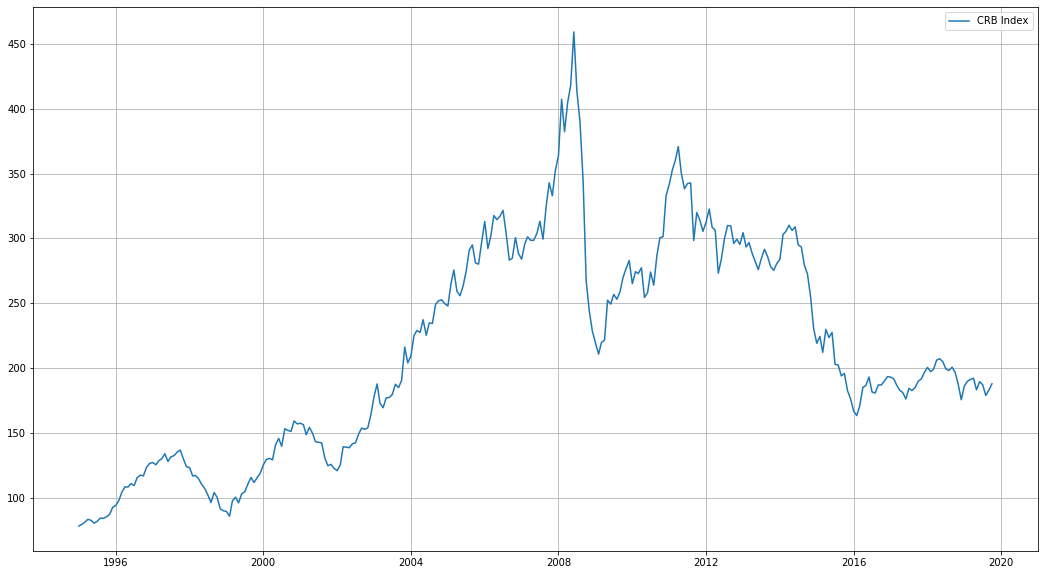

In [5]:
# Visualizzo i dati (chiusura) su grafico
fig,ax = plt.subplots(figsize=(18,10))

ax.plot_date(date_range, crb_index[start_date: end_date]['close'], '-', label="CRB Index")
ax.grid(True)
ax.legend()

## Bond

Fonte dati: https://www.investing.com/rates-bonds/us-10-yr-t-note-historical-data

In [6]:
TNOTE_PRICE_DATA_FILE = 'Dati/10y-t-note-price-monthly.csv'

def month_year_dateparser(dates):
    '''
    Parser di date nel formato "Nov 19"
    '''
    return list(map(lambda x: dt.datetime.strptime(x, '%b %y'), dates))


tnote_price = pd.read_csv(TNOTE_PRICE_DATA_FILE, parse_dates=['Date'], date_parser=month_year_dateparser)
tnote_price.set_index('Date', inplace=True)
tnote_price.sort_index(inplace=True)
tnote_price['pct_change'] = tnote_price['Price'].pct_change(1)*100

tnote_price


Price    Open    High     Low     Vol. Change %  pct_change
Date                                                                    
1990-01-01   97.00   99.59   99.94   95.97  472.19K   -2.76%         NaN
1990-02-01   96.41   97.00   97.81   95.22  542.04K   -0.61%   -0.608247
1990-03-01   95.44   96.34   96.72   94.94  178.77K   -1.01%   -1.006120
1990-04-01   93.25   95.47   96.62   92.91  371.67K   -2.29%   -2.294635
1990-05-01   95.94   93.41   96.22   92.81  507.96K    2.88%    2.884718
...            ...     ...     ...     ...      ...      ...         ...
2019-07-01  127.42  127.61  128.44  126.72   29.85M   -0.43%   -0.429788
2019-08-01  131.05  127.50  131.61  127.14   45.52M    2.85%    2.848846
2019-09-01  130.31  131.25  131.72  128.06   10.54M   -0.56%   -0.564670
2019-10-01  130.30  130.38  132.03  129.05   32.14M   -0.01%   -0.007674
2019-11-01  129.79  130.30  130.48  129.71        -   -0.39%   -0.391404

[359 rows x 7 columns]

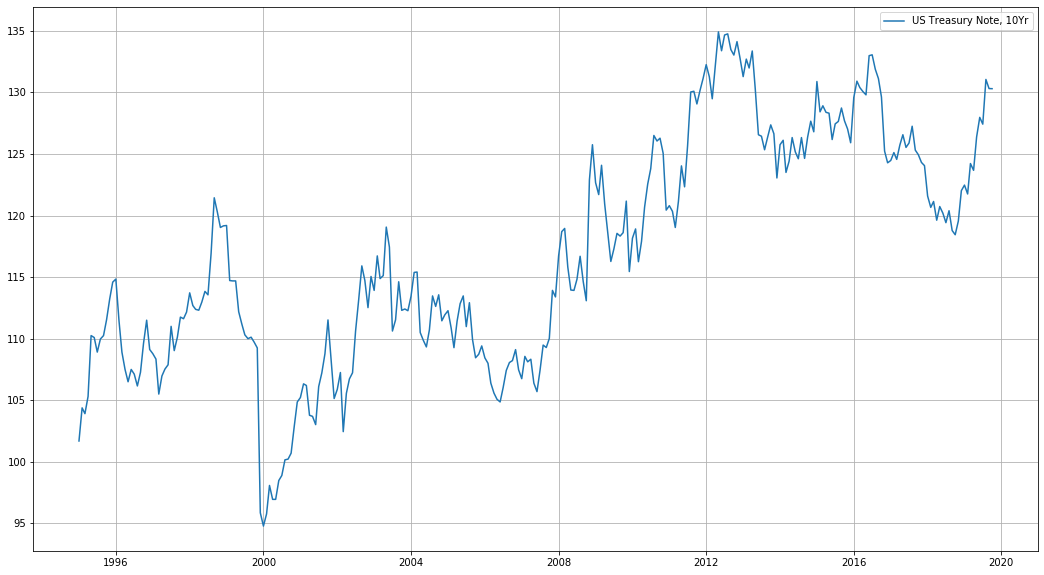

In [7]:
# Visualizzo i dati (chiusura) su grafico
fig,ax = plt.subplots(figsize=(18,10))

ax.plot_date(date_range, tnote_price[start_date: end_date]['Price'], '-', label="US Treasury Note, 10Yr")
ax.grid(True)
ax.legend()


## Stock

Fonte dati: https://www.investing.com/indices/us-spx-500-historical-data


In [8]:
SP500_INDEX_DATA_FILE = 'Dati/sp500-monthly.csv'

sp500_index_price = pd.read_csv(SP500_INDEX_DATA_FILE, parse_dates=['Date'], date_parser=month_year_dateparser)
sp500_index_price.set_index('Date', inplace=True)
sp500_index_price.sort_index(inplace=True)
sp500_index_price['pct_change'] = sp500_index_price['Price'].pct_change(1)*100

sp500_index_price




Price     Open     High      Low Vol. Change %  pct_change
Date                                                                    
1990-01-01   329.08   353.40   360.59   319.83    -   -6.88%         NaN
1990-02-01   331.89   329.08   336.09   322.10    -    0.85%    0.853896
1990-03-01   339.94   331.89   344.49   331.08    -    2.43%    2.425502
1990-04-01   330.80   339.94   347.30   327.76    -   -2.69%   -2.688710
1990-05-01   361.23   330.80   362.26   330.80    -    9.20%    9.198912
...             ...      ...      ...      ...  ...      ...         ...
2019-07-01  2980.38  2971.41  3027.98  2952.22    -    1.31%    1.312820
2019-08-01  2926.46  2980.32  3013.59  2822.12    -   -1.81%   -1.809165
2019-09-01  2976.74  2909.01  3021.99  2891.85    -    1.72%    1.718117
2019-10-01  3037.56  2983.69  3050.10  2855.94    -    2.04%    2.043175
2019-11-01  3066.91  3054.20  3066.91  3052.70    -    0.97%    0.966236

[359 rows x 7 columns]

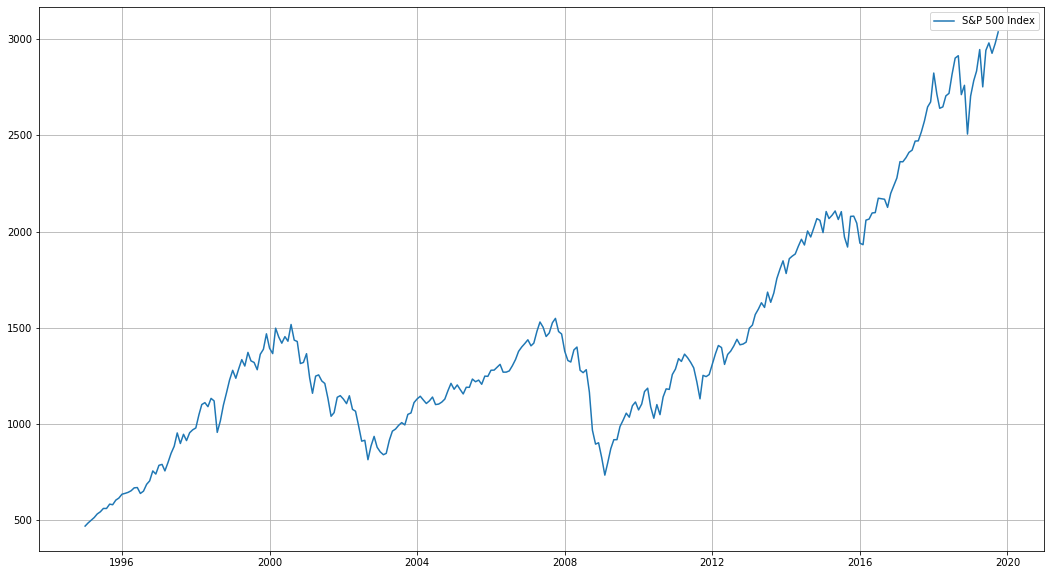

In [9]:
# Visualizzo i dati (chiusura) su grafico
fig,ax = plt.subplots(figsize=(18,10))

ax.plot_date(date_range, sp500_index_price[start_date: end_date]['Price'], '-', label="S&P 500 Index")
ax.grid(True)
ax.legend()


## Forex

Fonte dati: https://www.investing.com/indices/usdollar-historical-data 

In [10]:
USDOLLAR_INDEX_DATA_FILE = 'Dati/us-dollar-index-monthly.csv'

usdollar_index_price = pd.read_csv(USDOLLAR_INDEX_DATA_FILE, parse_dates=['Date'], date_parser=month_year_dateparser)
usdollar_index_price.set_index('Date', inplace=True)
usdollar_index_price.sort_index(inplace=True)
usdollar_index_price['pct_change'] = usdollar_index_price['Price'].pct_change(1)*100

usdollar_index_price

Price   Open   High    Low Vol. Change %  pct_change
Date                                                            
1990-01-01  92.41  93.19  94.54  91.89    -   -0.86%         NaN
1990-02-01  93.29  92.32  93.45  91.26    -    0.95%    0.952278
1990-03-01  93.69  93.67  94.72  93.23    -    0.43%    0.428771
1990-04-01  93.07  94.28  94.32  92.71    -   -0.66%   -0.661757
1990-05-01  92.98  93.23  93.30  90.66    -   -0.10%   -0.096701
...           ...    ...    ...    ...  ...      ...         ...
2019-07-01  98.52  96.25  98.68  96.25    -    2.49%    2.486217
2019-08-01  98.92  98.59  99.02  97.03    -    0.41%    0.406009
2019-09-01  99.38  98.83  99.46  97.86    -    0.47%    0.465022
2019-10-01  97.29  99.39  99.67  97.14    -   -2.10%   -2.103039
2019-11-01  97.30  97.29  97.45  97.11    -    0.01%    0.010279

[359 rows x 7 columns]

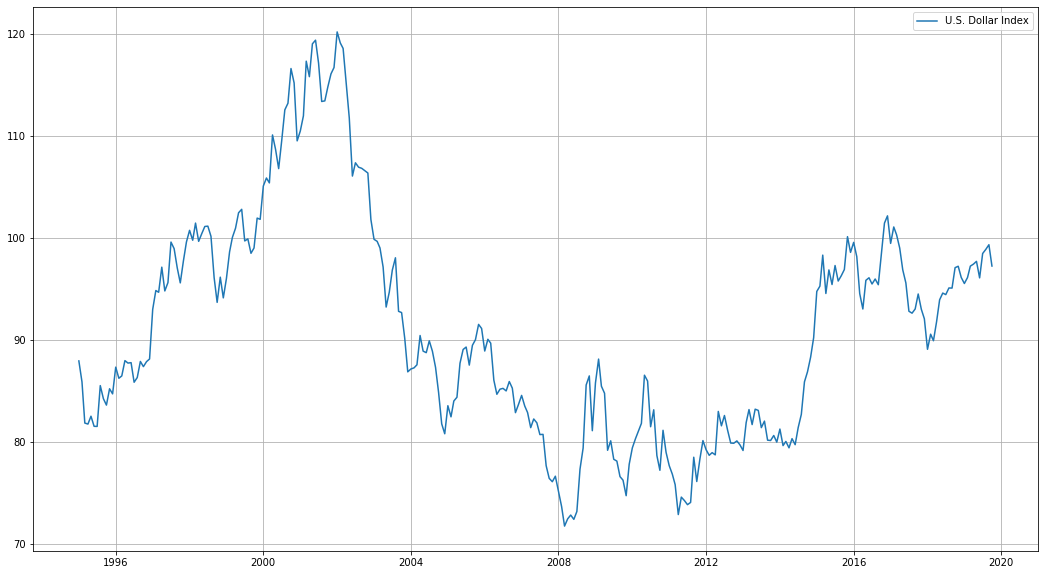

In [11]:
# Visualizzo i dati (chiusura) su grafico
fig,ax = plt.subplots(figsize=(18,10))

ax.plot_date(date_range, usdollar_index_price[start_date: end_date]['Price'], '-', label="U.S. Dollar Index")
ax.grid(True)
ax.legend()

## Gold

Fonte dati: https://www.investing.com/commodities/gold-historical-data

In [12]:
GOLD_FUTURES_DATA_FILE = 'Dati/gold-futures-monthly.csv'

gold_futures_price = pd.read_csv(GOLD_FUTURES_DATA_FILE, parse_dates=['Date'], date_parser=month_year_dateparser)
gold_futures_price.set_index('Date', inplace=True)
gold_futures_price.sort_index(inplace=True)
gold_futures_price['pct_change'] = gold_futures_price['Price'].pct_change(1)*100

gold_futures_price

Price     Open     High      Low    Vol. Change %  pct_change
Date                                                                       
1990-01-01   412.40   399.60   422.00   393.00  27.00K    2.46%         NaN
1990-02-01   406.10   413.00   425.00   405.50   9.95K   -1.53%   -1.527643
1990-03-01   370.20   402.50   404.10   365.80  25.01K   -8.84%   -8.840187
1990-04-01   368.40   367.20   381.10   367.10   7.02K   -0.49%   -0.486224
1990-05-01   364.30   368.00   375.60   362.70  29.89K   -1.11%   -1.112921
...             ...      ...      ...      ...     ...      ...         ...
2019-07-01  1437.80  1418.00  1467.00  1396.40   1.70M    0.89%    0.891166
2019-08-01  1529.40  1425.60  1565.00  1412.10   9.04M    6.37%    6.370844
2019-09-01  1472.90  1535.20  1566.20  1470.50   8.16M   -3.69%   -3.694259
2019-10-01  1514.80  1478.00  1525.80  1465.00   7.63M    2.84%    2.844728
2019-11-01  1511.15  1514.75  1518.15  1505.55       -   -0.24%   -0.240956

[359 rows x 7 columns]

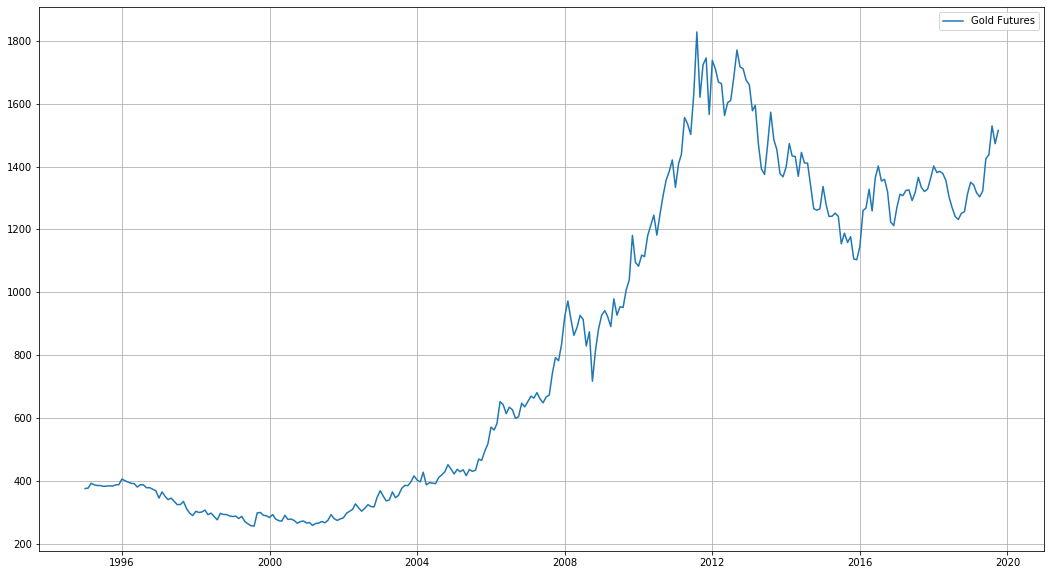

In [13]:
# Visualizzo i dati (chiusura) su grafico
fig,ax = plt.subplots(figsize=(18,10))

ax.plot_date(date_range, gold_futures_price[start_date: end_date]['Price'], '-', label="Gold Futures")
ax.grid(True)
ax.legend()

## Crude Oil WTI

Fonte dati: https://www.investing.com/commodities/crude-oil-historical-data

In [14]:
CRUDE_OIL_DATA_FILE = 'Dati/crude-oil-wti-futures-monthly.csv'

crude_oil_futures_price = pd.read_csv(CRUDE_OIL_DATA_FILE, parse_dates=['Date'], date_parser=month_year_dateparser)
crude_oil_futures_price.set_index('Date', inplace=True)
crude_oil_futures_price.sort_index(inplace=True)
crude_oil_futures_price['pct_change'] = crude_oil_futures_price['Price'].pct_change(1)*100

crude_oil_futures_price

Price   Open   High    Low     Vol. Change %  pct_change
Date                                                                
1990-01-01  22.68  21.81  24.20  21.25  803.21K    3.94%         NaN
1990-02-01  21.54  22.61  23.06  21.40  609.14K   -5.03%   -5.026455
1990-03-01  20.28  21.73  21.77  19.07  568.36K   -5.85%   -5.849582
1990-04-01  18.54  20.20  20.55  16.25  611.10K   -8.58%   -8.579882
1990-05-01  17.40  18.46  19.75  17.32  779.67K   -6.15%   -6.148867
...           ...    ...    ...    ...      ...      ...         ...
2019-07-01  58.58  59.27  60.94  54.72   11.80M    0.19%    0.188131
2019-08-01  55.10  57.85  57.99  50.52   14.04M   -5.94%   -5.940594
2019-09-01  54.07  55.00  63.38  52.84   13.08M   -1.87%   -1.869328
2019-10-01  54.18  54.28  56.92  50.99   11.55M    0.20%    0.203440
2019-11-01  57.26  54.12  57.43  54.09        -    5.68%    5.684755

[359 rows x 7 columns]

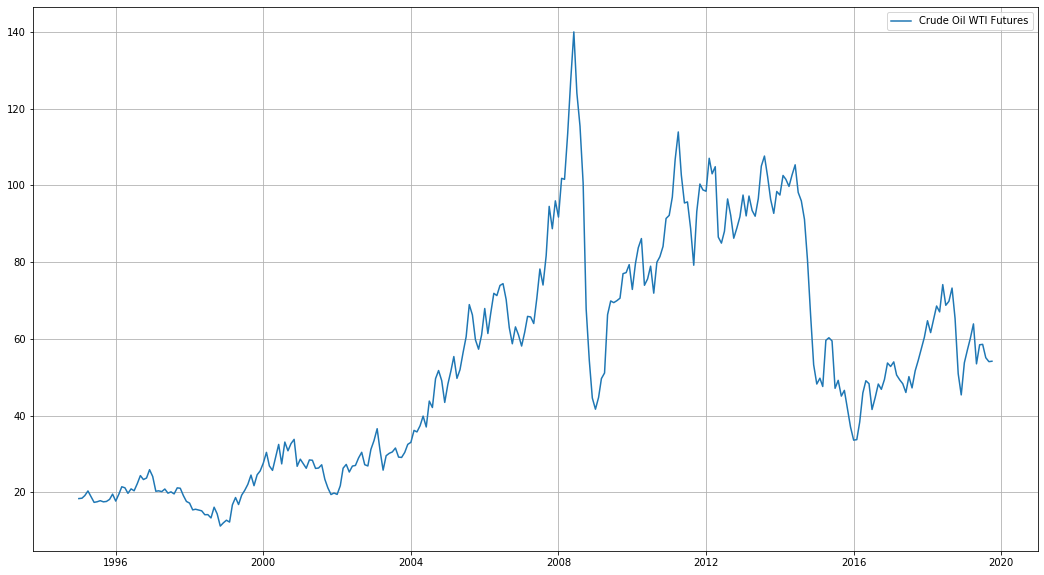

In [15]:
# Visualizzo i dati (chiusura) su grafico
fig,ax = plt.subplots(figsize=(18,10))

ax.plot_date(date_range, crude_oil_futures_price[start_date: end_date]['Price'], '-', label="Crude Oil WTI Futures")
ax.grid(True)
ax.legend()

## GDP US

Fonte dati: https://fred.stlouisfed.org/series/GDP

In [16]:
GDP_US_DATA_FILE = 'Dati/gdp-us-quarterly.csv'

gdp_us = pd.read_csv(GDP_US_DATA_FILE, parse_dates=['DATE'])
gdp_us.set_index('DATE', inplace=True)
gdp_us.sort_index(inplace=True)
gdp_us = gdp_us.asfreq('MS').interpolate(method='cubic')
gdp_us['pct_change'] = gdp_us['GDP'].pct_change(1)*100



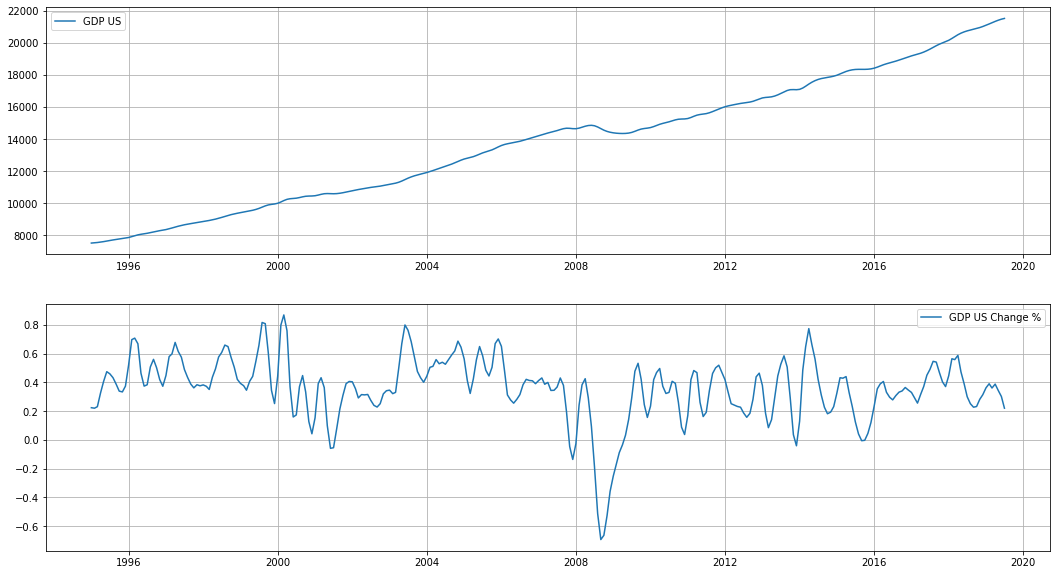

In [17]:
# Visualizzo i dati su grafico
fig,ax = plt.subplots(2, figsize=(18,10))

ax[0].plot(gdp_us[start_date: end_date]['GDP'], '-', label="GDP US")
ax[0].grid(True)
ax[0].legend()

ax[1].plot(gdp_us[start_date: end_date]['pct_change'], '-', label="GDP US Change %")
ax[1].grid(True)
ax[1].legend()

## Bitcoin

Fonte dati: https://www.investing.com/crypto/bitcoin/historical-data

In [34]:
BITCOIN_DATA_FILE = 'Dati/bitcoin-monthly.csv'

bitcoin_price = pd.read_csv(BITCOIN_DATA_FILE, parse_dates=['Date'], date_parser=month_year_dateparser)
bitcoin_price.set_index('Date', inplace=True)
bitcoin_price.sort_index(inplace=True)
bitcoin_price['pct_change'] = crude_oil_futures_price['Price'].pct_change(1)*100

bitcoin_price

Price     Open     High     Low     Vol. Change %  pct_change
Date                                                                       
2010-08-01      0.1      0.1      0.1     0.0  221.74K    0.00%   -8.904370
2010-09-01      0.1      0.1      0.2     0.1  216.81K    0.00%   11.192992
2010-10-01      0.2      0.1      0.2     0.0    1.11M  210.99%    1.825685
2010-11-01      0.2      0.2      0.5     0.1  826.25K    0.00%    3.291170
2010-12-01      0.3      0.2      0.3     0.2  263.65K   44.09%    8.643443
...             ...      ...      ...     ...      ...      ...         ...
2019-07-01  10082.0  10821.4  13134.4  9082.6   23.61M   -6.81%    0.188131
2019-08-01   9594.4  10081.9  12291.9  9343.0   17.53M   -4.84%   -5.940594
2019-09-01   8284.3   9594.7  10896.2  7749.0   13.58M  -13.65%   -1.869328
2019-10-01   9152.6   8285.0  10540.0  7329.2   19.93M   10.48%    0.203440
2019-11-01   9283.7   9153.1   9500.4  9057.2    3.16M    1.43%    5.684755

[112 rows x 7 columns]

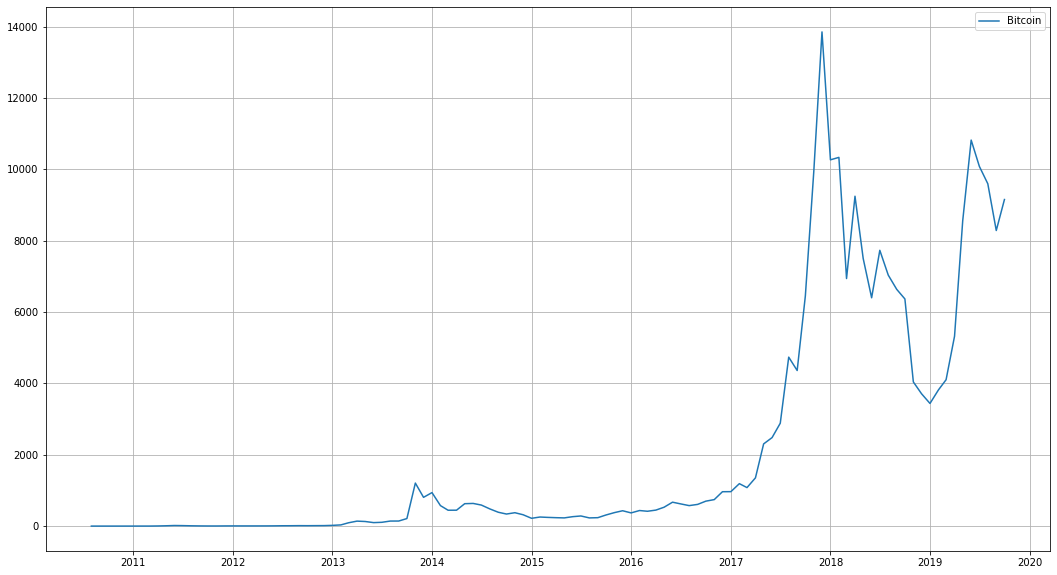

In [37]:
# Visualizzo i dati (chiusura) su grafico
fig,ax = plt.subplots(figsize=(18,10))

ax.plot_date(date_range_2, bitcoin_price[start_date_2: end_date]['Price'], '-', label="Bitcoin")
ax.grid(True)
ax.legend()

# Correlazioni

## Commodity-Bond



In [18]:
# Calcolo correlazione
corr_comm_bond = crb_index['close'].rolling(12).corr(tnote_price['Price'])
corr_stats = get_correlation_statistics(corr_comm_bond)
corr_stats

{'pos': 26.76, 'neg': 73.24, 'strong_pos': 9.36, 'strong_neg': 21.74}

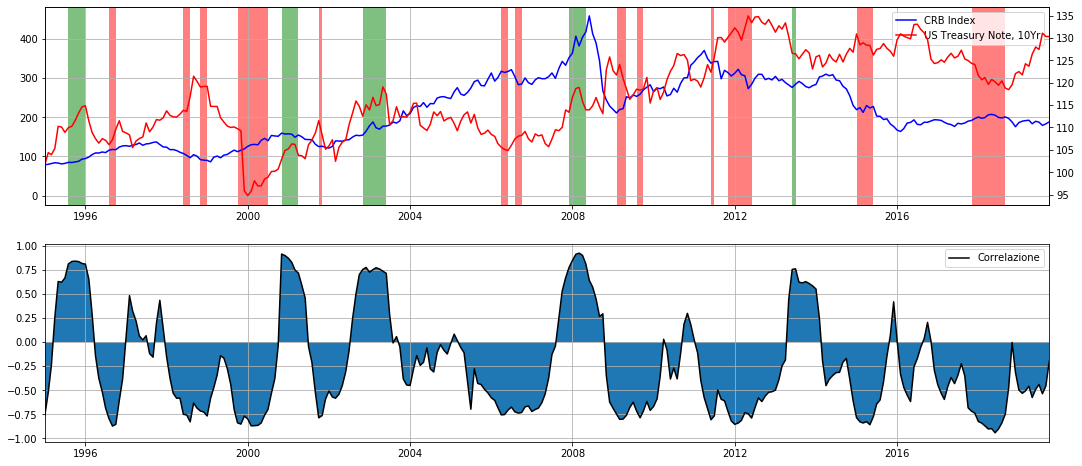

In [19]:
# Visualizzo i dati su grafico
plot_correlations(crb_index['close'], 
                  tnote_price['Price'],
                  "CRB Index", "US Treasury Note, 10Yr")


## US Dollar e Commodity

In [20]:
# Calcolo correlazione
corr_usd_comm = usdollar_index_price['Price'].rolling(12).corr(crb_index['close'])
corr_stats = get_correlation_statistics(corr_usd_comm)
corr_stats

{'pos': 28.76, 'neg': 71.24, 'strong_pos': 8.03, 'strong_neg': 39.46}

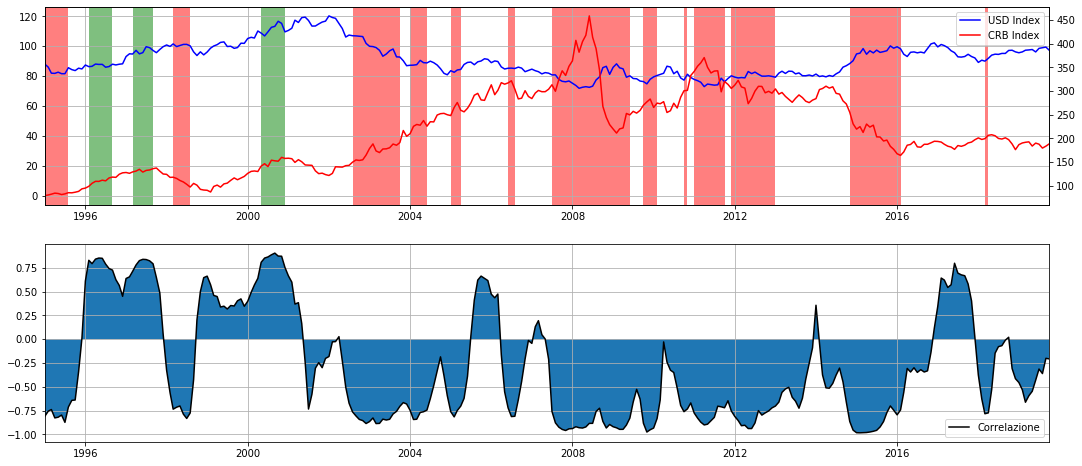

In [21]:
# Visualizzo i dati su grafico
plot_correlations(usdollar_index_price['Price'], 
                  crb_index['close'], 
                  "USD Index", "CRB Index")

## US Dollar e Bond

In [22]:
# Calcolo correlazione
corr_usd_bond = usdollar_index_price['Price'].rolling(12).corr(tnote_price['Price'])
corr_stats = get_correlation_statistics(corr_usd_bond)
corr_stats

{'pos': 47.41, 'neg': 52.59, 'strong_pos': 10.34, 'strong_neg': 15.23}

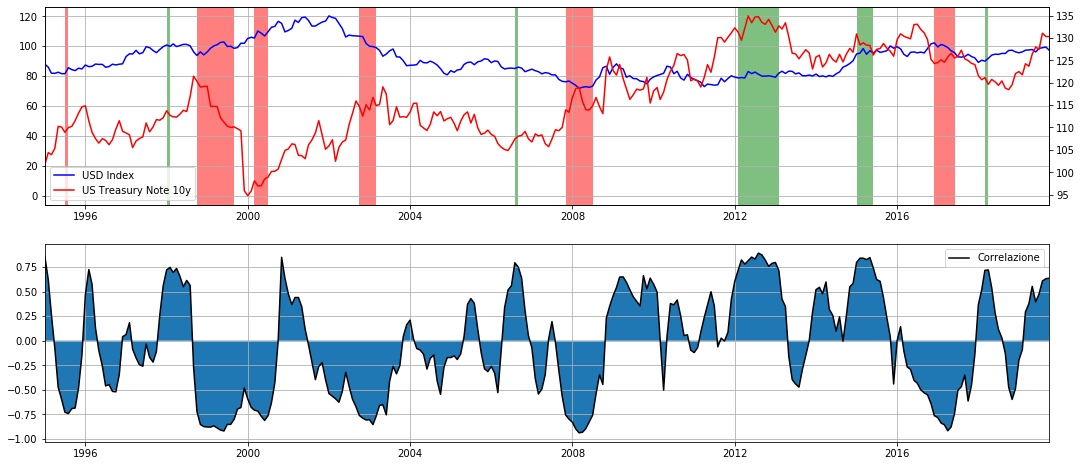

In [23]:
# Visualizzo i dati su grafico
plot_correlations(usdollar_index_price['Price'], 
                  tnote_price['Price'], 
                  "USD Index", "US Treasury Note 10y")

## US Dollar e Stock

In [24]:
# Calcolo correlazione
corr_usd_stock = usdollar_index_price['Price'].rolling(12).corr(sp500_index_price['Price'])
corr_stats = get_correlation_statistics(corr_usd_stock)
corr_stats

{'pos': 51.44, 'neg': 48.56, 'strong_pos': 20.69, 'strong_neg': 19.83}

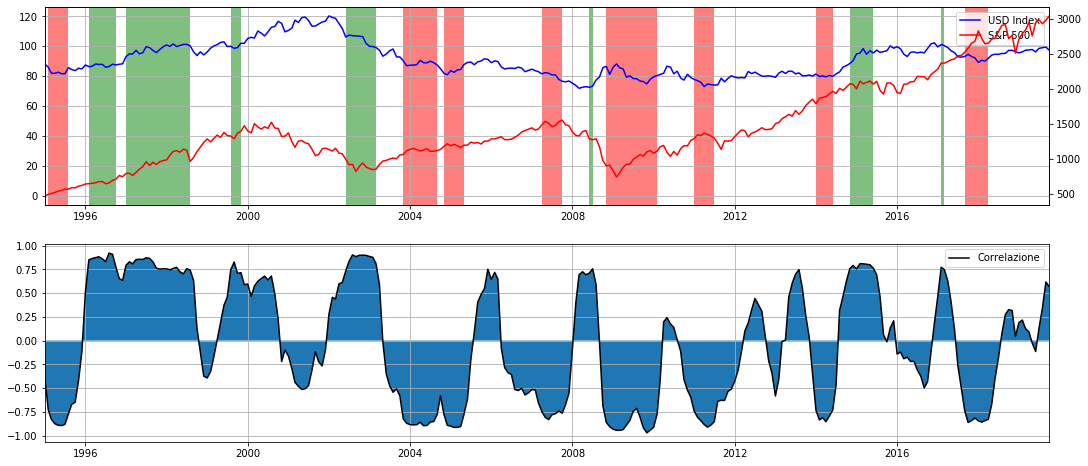

In [25]:
# Visualizzo i dati su grafico
plot_correlations(usdollar_index_price['Price'], 
                  sp500_index_price['Price'], 
                  "USD Index", "S&P 500")

## US Dollar e Gold


In [26]:
# Calcolo correlazione
corr_usd_gold = usdollar_index_price['Price'].rolling(12).corr(gold_futures_price['Price'])
corr_stats = get_correlation_statistics(corr_usd_gold)
corr_stats

{'pos': 20.11, 'neg': 79.89, 'strong_pos': 0.86, 'strong_neg': 37.36}

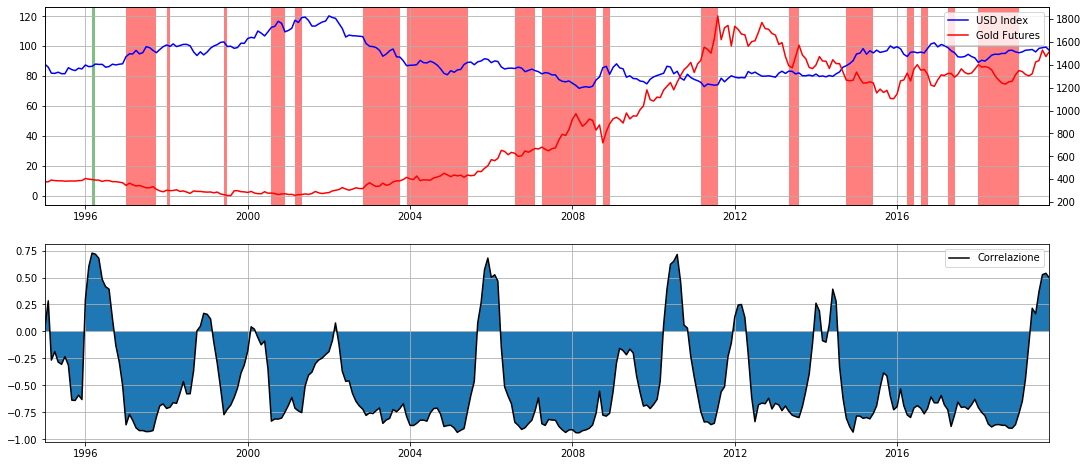

In [27]:
# Visualizzo i dati su grafico
plot_correlations(usdollar_index_price['Price'], 
                  gold_futures_price['Price'], 
                  "USD Index", "Gold Futures")

## Esercizio: US Dollar e Crude Oil

In [28]:
# Calcolo correlazione
corr_usd_oil = usdollar_index_price['Price'].rolling(12).corr(crude_oil_futures_price['Price'])
corr_stats = get_correlation_statistics(corr_usd_oil)
corr_stats

{'pos': 29.6, 'neg': 70.4, 'strong_pos': 3.16, 'strong_neg': 29.6}

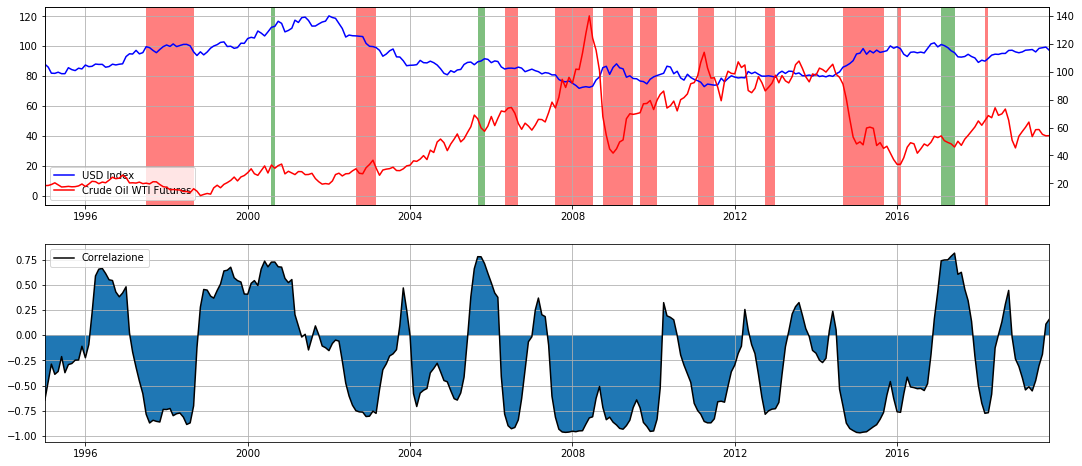

In [29]:
# Visualizzo i dati su grafico
plot_correlations(usdollar_index_price['Price'], 
                  crude_oil_futures_price['Price'], 
                  "USD Index", "Crude Oil WTI Futures")

## Esercizio: GDP US e Crude Oil

In [30]:
# Calcolo correlazione
corr_gdp_oil = gdp_us['GDP'].rolling(12).corr(crude_oil_futures_price['Price'])
corr_stats = get_correlation_statistics(corr_gdp_oil)
corr_stats

{'pos': 61.05, 'neg': 38.95, 'strong_pos': 32.56, 'strong_neg': 11.92}

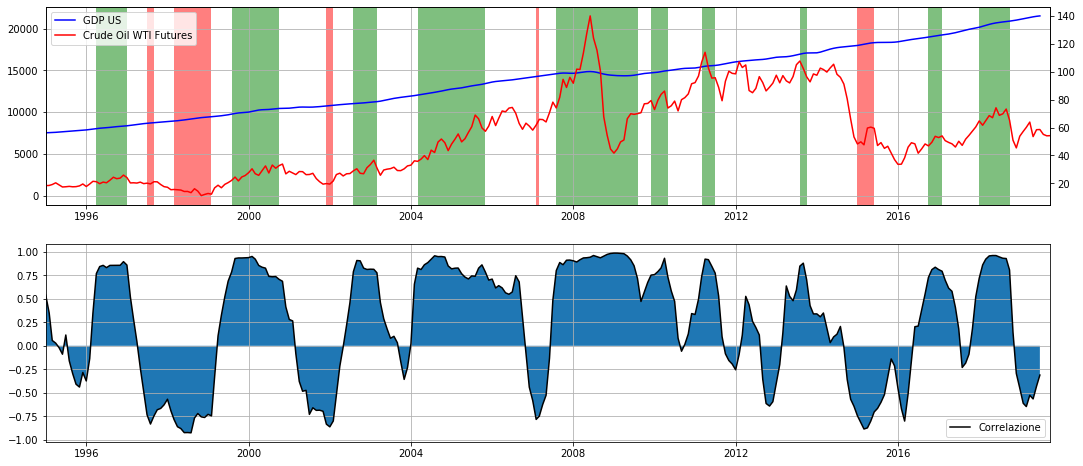

In [31]:
# Visualizzo i dati su grafico
plot_correlations(gdp_us['GDP'], 
                  crude_oil_futures_price['Price'], 
                  "GDP US", "Crude Oil WTI Futures")

In [32]:
# Calcolo correlazione
corr_gdpc_oil = gdp_us['pct_change'].rolling(12).corr(crude_oil_futures_price['Price'])
corr_stats = get_correlation_statistics(corr_gdpc_oil)
corr_stats

{'pos': 41.86, 'neg': 58.14, 'strong_pos': 5.23, 'strong_neg': 12.21}

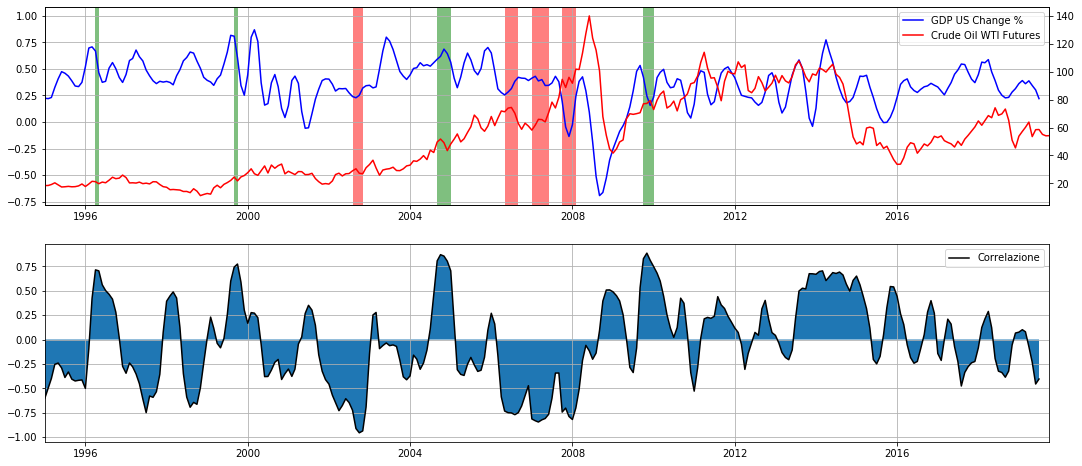

In [33]:
# Visualizzo i dati su grafico
plot_correlations(gdp_us['pct_change'], 
                  crude_oil_futures_price['Price'], 
                  "GDP US Change %", "Crude Oil WTI Futures")

## Esercizio: Gold e Bitcoin

In [40]:
# Calcolo correlazione
corr_gold_btc = gold_futures_price['Price'].rolling(12).corr(bitcoin_price['Price'])
corr_stats = get_correlation_statistics(corr_gold_btc)
corr_stats

{'pos': 58.42, 'neg': 41.58, 'strong_pos': 11.88, 'strong_neg': 10.89}

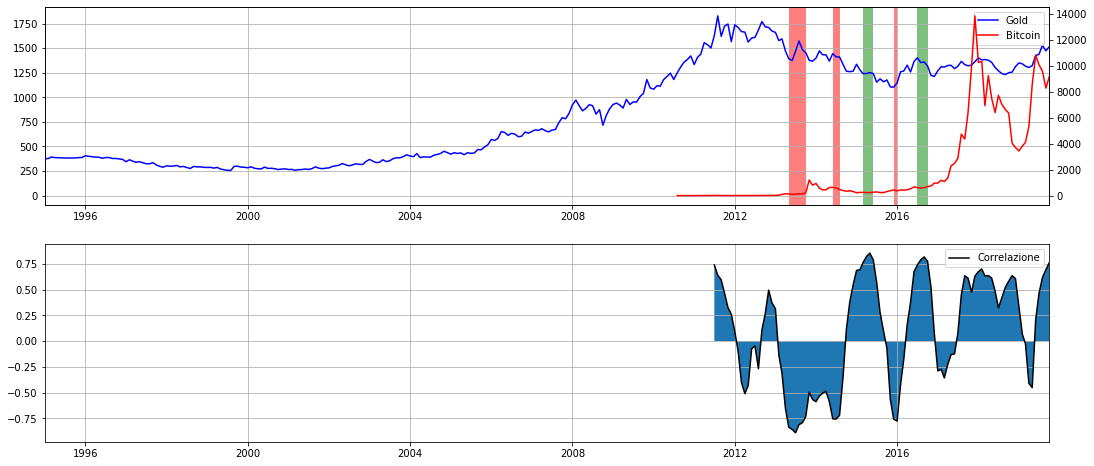

In [41]:
# Visualizzo i dati su grafico
plot_correlations(gold_futures_price['Price'], 
                  bitcoin_price['Price'], 
                  "Gold", "Bitcoin")